In [35]:
import pandas as pd
import numpy as np
import polars as pl

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

#data = pl.read_csv(r'C:\Users\600318012\Coding\Github_v1\TheRepo\leadgendataset.csv', dtypes={col: pl.Utf8 for col in pl.read_csv(r'C:\Users\600318012\Coding\Github_v1\TheRepo\leadgendataset.csv', n_rows=0).columns})
data = pd.read_csv(r'C:\Users\600318012\Coding\Github_v1\TheRepo\leadgendataset.csv', dtype=str)
data

,sf_flag,rn_flag,duns_number,business_name,tradestyle_name,second_tradestyle_name,street_address,street_address_2,city_name,state_province_abbr,postal_code,country_name,state_province_name,county_name,delist_indicator,latitude,longitude,mailing_address,mailing_address_2,mailing_city_name,mailing_state_province_abbr,mailing_postal_code,carrier_route_code,db_continent_code,db_national_code,db_state_code,db_city_code,db_county_code,smsa_code,economic_area_of_influence_cd,fips_country_code,fips_state_code,fips_county_code,fips_msa_code,latitude_short,longitude_short,geo_code_accuracy,telephone_number,country_access_code,facsimile_number,chief_exec_officer_full_name,chief_exec_officer_first_name,chief_exec_officer_middle_init,chief_exec_officer_last_name,chief_exec_officer_suffix,chief_exec_officer_prefix,chief_exec_officer_title,chief_exec_officer_mrc_code,chief_exec_officer_gender_code,sales_volume_us_dollars,sales_vol_us_doll_reliablty_cd,sales_volume_local_currency,sales_vol_lcl_cur_reliablty_cd,currency_code,employees_total,employees_total_reliability_cd,employees_here,employees_here_reliability_cd,year_started,status_code,subsidiary_indicator,manufacturing_indicator,population_code,small_business_indicator,minority_owned_indicator,public_private_indicator,site_status,legal_status_code,import_export_agent_code,owns_rents_code,square_footage,global_ultimate_duns_number,global_ultimate_business_name,global_ultimate_indicator,global_ultimate_fips_cntry_cd,global_ultimate_db_country_cd,global_ult_state_province_abbr,domestic_ultimate_duns_number,domestic_ultimate_bus_name,domestic_ult_fips_country_code,domestic_ult_db_country_code,domestic_ult_st_province_abbr,parent_duns_number,headquarter_duns_number,parent_hq_business_name,parent_hq_fips_country_code,parent_hq_db_country_code,parent_hq_state_province_abbr,hierarchy_code,dias_code,number_of_family_members,last_update_date,major_industry_category,line_of_business,us_1987_sic_1,us_1987_sic_2,us_1987_sic_3,us_1987_sic_4,us_1987_sic_5,us_1987_sic_6,national_identification_number,primary_local_activity_code,yr_3_growth_pct_on_sales_vol,yr_3_growth_pct_on_employees,year_3_base_sales_amount,year_3_base_employee_count,yr_5_growth_pct_on_sales_vol,yr_5_growth_pct_on_employees,year_5_base_sales_amount,year_5_base_employee_count,trend_year_sales_amount,trend_year_employee_count,accounting_firm_name,first_executive_first_name,first_executive_middle_initial,first_executive_last_name,first_executive_suffix,first_executive_prefix,first_executive_title,first_executive_mrc_code,second_executive_first_name,second_executive_middle_init,second_executive_last_name,second_executive_suffix,second_executive_prefix,second_executive_title,second_executive_mrc_code,third_executive_first_name,third_executive_middle_initial,third_executive_last_name,third_executive_suffix,third_executive_prefix,third_executive_title,third_executive_mrc_code,case_duns,case_global_ultimate,linkage_structure_code,franchise_type_code_1,corporate_linkage_type_1,operational_duns1,operational_duns_global_ult1,franchise_type_code_2,corporate_linkage_type_2,operational_duns2,operational_duns_global_ult2,franchise_type_code_3,corporate_linkage_type_3,operational_duns3,operational_duns_global_ult3,franchise_type_code_4,corporate_linkage_type_4,operational_duns4,operational_duns_global_ult4,franchise_type_code_5,corporate_linkage_type_5,operational_duns5,operational_duns_global_ult5,franchise_type_code_6,corporate_linkage_type_6,operational_duns6,operational_duns_global_ult6,change_date_as_of,minor_jnt_ventr_owner_to_duns1,percent_of_ownership_1,minor_jnt_ventr_owner_to_duns2,percent_of_ownership_2,minor_jnt_ventr_owner_to_duns3,percent_of_ownership_3,minor_jnt_ventr_owner_to_duns4,percent_of_ownership_4,minor_jnt_ventr_owner_to_duns5,percent_of_ownership_5,minor_jnt_ventr_owner_to_duns6,percent_of_ownership_6,minority_joint_venture_owner,case_sic,case_country_code,financial_stress_score,db_rating,paydex,net_worth,source_indicator,bemf

In [42]:
import pandas as pd

# -------- DROP GROUP 1 COLUMNS --------
data.drop(columns=[
    'duns_number', 'business_name', 'tradestyle_name', 'second_tradestyle_name',
    'street_address', 'street_address_2', 'city_name', 'state_province_abbr',
    'postal_code', 'country_name', 'state_province_name', 'county_name',
    'delist_indicator', 'latitude', 'longitude', 'mailing_address',
    'mailing_address_2', 'mailing_city_name', 'mailing_state_province_abbr',
    'mailing_postal_code', 'carrier_route_code', 'db_continent_code',
    'db_national_code', 'db_state_code', 'db_city_code', 'db_county_code',
    'smsa_code', 'economic_area_of_influence_cd', 'fips_country_code',
    'fips_state_code', 'fips_county_code', 'fips_msa_code', 'latitude_short',
    'longitude_short', 'geo_code_accuracy', 'telephone_number',
    'country_access_code', 'facsimile_number', 'chief_exec_officer_full_name',
    'chief_exec_officer_first_name', 'chief_exec_officer_middle_init',
    'chief_exec_officer_last_name', 'chief_exec_officer_suffix',
    'chief_exec_officer_prefix', 'chief_exec_officer_title',
    'chief_exec_officer_mrc_code', 'chief_exec_officer_gender_code',
    'sales_volume_local_currency', 'sales_vol_lcl_cur_reliablty_cd',
    'year_3_base_sales_amount', 'year_3_base_employee_count',
    'year_5_base_sales_amount', 'year_5_base_employee_count',
    'accounting_firm_name', 'first_executive_first_name',
    'first_executive_middle_initial', 'first_executive_last_name',
    'first_executive_suffix', 'first_executive_prefix', 'first_executive_title',
    'first_executive_mrc_code', 'second_executive_first_name',
    'second_executive_middle_init', 'second_executive_last_name',
    'second_executive_suffix', 'second_executive_prefix', 'second_executive_title',
    'second_executive_mrc_code', 'third_executive_first_name',
    'third_executive_middle_initial', 'third_executive_last_name',
    'third_executive_suffix', 'third_executive_prefix', 'third_executive_title',
    'third_executive_mrc_code', 'case_duns', 'case_global_ultimate',
    'linkage_structure_code', 'franchise_type_code_1', 'corporate_linkage_type_1',
    'operational_duns1', 'operational_duns_global_ult1', 'franchise_type_code_2',
    'corporate_linkage_type_2', 'operational_duns2', 'operational_duns_global_ult2',
    'franchise_type_code_3', 'corporate_linkage_type_3', 'operational_duns3',
    'operational_duns_global_ult3', 'franchise_type_code_4',
    'corporate_linkage_type_4', 'operational_duns4', 'operational_duns_global_ult4',
    'franchise_type_code_5', 'corporate_linkage_type_5', 'operational_duns5',
    'operational_duns_global_ult5', 'franchise_type_code_6',
    'corporate_linkage_type_6', 'operational_duns6', 'operational_duns_global_ult6',
    'change_date_as_of', 'minor_jnt_ventr_owner_to_duns1', 'percent_of_ownership_1',
    'minor_jnt_ventr_owner_to_duns2', 'percent_of_ownership_2',
    'minor_jnt_ventr_owner_to_duns3', 'percent_of_ownership_3',
    'minor_jnt_ventr_owner_to_duns4', 'percent_of_ownership_4',
    'minor_jnt_ventr_owner_to_duns5', 'percent_of_ownership_5',
    'minor_jnt_ventr_owner_to_duns6', 'percent_of_ownership_6',
    'minority_joint_venture_owner', 'case_sic', 'case_country_code',
    'db_rating', 'net_worth', 'source_indicator', 'bemfab_marketability',
    'marketability_indicator', 'out_of_business_indicator', 'nixie_indicator',
    'non_classified_sic_indicator', 'company_status', 'company_status_date',
    'duns_number_merged_into', 'recertification_code', 'dot_linkage',
    'duns_linkage', 'insert_source_file_name', 'insert_timestamp',
    'update_source_file_name', 'update_timestamp', 'effective_dt', 'expiration_dt',
    'load_date', 'uuid', 'file_name', '_hoodie_commit_time',
    '_hoodie_commit_seqno', '_hoodie_record_key', '_hoodie_partition_path',
    '_hoodie_file_name', 'file_date', 'naics', 'legal_status_code_decoded',
    'corporate_linkage_type_1_decoded', 'out_of_business_indicator_decoded',
    'nixie_indicator_decoded', 'hierarchy_grade', 'hierarchy_grade_decoded',
    'sources_array', 'bemfab_marketability_decoded', 'update_date',
    'global_ultimate_duns_number.1', 'global_ultimate_business_name.1',
    'global_ultimate_sic_8digit', 'global_enterprise_group',
    'site_duns_number', 'site_business_name', 'site_sic_8digit',
    'site_status_code', 'site_subsidiary_indicator', 'site_bemfab_marketability',
    'site_out_of_business_indicator', 'site_company_status', 'site_dot_linkage',
    'stepdown_duns_number', 'stepdown_business_name', 'stepdown_sic_code_8digit',
    'stepdown_sic_category', 'stepdown_family_members', 'stepdown_final_sales',
    'stepdown_sales', 'stepdown_sum_sales', 'stepdown_complexity',
    'stepdown_size', 'stepdown_segment', 'stepdown_major_industry_category',
    'final_duns_number', 'final_sic_8digit', 'enterprise_group', 'import_export_agent_code'
], inplace=True, errors='ignore')

# -------- CONVERT GROUP 2 COLUMNS TO NUMERIC --------
for col in [
    'sf_flag', 'rn_flag', 'sales_volume_us_dollars', 'employees_total',
    'employees_here', 'year_started', 'subsidiary_indicator',
    'manufacturing_indicator', 'number_of_family_members',
    'yr_3_growth_pct_on_sales_vol', 'yr_3_growth_pct_on_employees',
    'yr_5_growth_pct_on_sales_vol', 'yr_5_growth_pct_on_employees',
    'trend_year_sales_amount', 'trend_year_employee_count', 'financial_stress_score',
    'paydex', 'hierarchy_level', 'sources_num', 'global_ultimate_sales_volume_us_dollars',
    'global_ultimate_sum_sales_volume_us_dollars', 'global_ultimate_number_of_family_members',
    'final_sales', 'final_sales_agg', 'final_family_member', 'global_ult_fleet_allocation',
    'fleet_allocation', 'trailer_fleet_allocation'
]:
    data[col] = pd.to_numeric(data[col])



# -------- CONVERT GROUP 3 COLUMNS TO CATEGORY --------
for col in [
    'sales_vol_us_doll_reliablty_cd', 'currency_code', 'employees_total_reliability_cd',
    'employees_here_reliability_cd', 'status_code', 'population_code',
    'legal_status_code', 'owns_rents_code', 'major_industry_category',
    'penske_category', 'company_type', 'complex_company_indicator',
    'status_code_decoded', 'subsidiary_indicator_decoded',
    'small_business_indicator_decoded', 'public_private_indicator_decoded',
    'global_ultimate_indicator_decoded', 'major_industry_category_decoded',
    'global_ultimate_sic_category', 'global_ultimate_complexity',
    'global_ultimate_size', 'global_ultimate_segment',
    'global_ultimate_major_industry_category', 'global_sales_deployment',
    'final_size', 'final_complexity', 'final_segment', 'final_group',
    'sales_deployment'
]:
    data[col] = data[col].astype('category')

# -------- CONVERT GROUP 4 COLUMNS TO BINARY --------
true_values = ['n', 'yes', 'true', 't', '1']
false_values = ['n', 'no', 'false', 'f', '0']

for col in [
    'small_business_indicator', 'minority_owned_indicator', 'public_private_indicator',
    'global_ultimate_indicator',
    'holding_finance_indicator'
]:
    data[col] = data[col].astype(str).str.strip().str.lower()
    data[col] = data[col].apply(lambda x: 1 if x in true_values else (0 if x in false_values else pd.NA)).astype('Int64')


In [43]:
data.isnull().sum().sort_values(ascending=False)

us_1987_sic_6                998
us_1987_sic_5                996
us_1987_sic_4                987
stepdown_fleet_allocation    978
us_1987_sic_3                972
                            ... 
final_sales                    0
sales_deployment               0
final_group                    0
final_segment                  0
final_complexity               0
Length: 97, dtype: int64

Accuracy: 0.805
Confusion Matrix:
[[149   7]
 [ 32  12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       156
           1       0.63      0.27      0.38        44

    accuracy                           0.81       200
   macro avg       0.73      0.61      0.63       200
weighted avg       0.78      0.81      0.77       200

ROC-AUC Scores for each class:
Class 0: 0.7938519813519813
Class 1: 0.7938519813519813


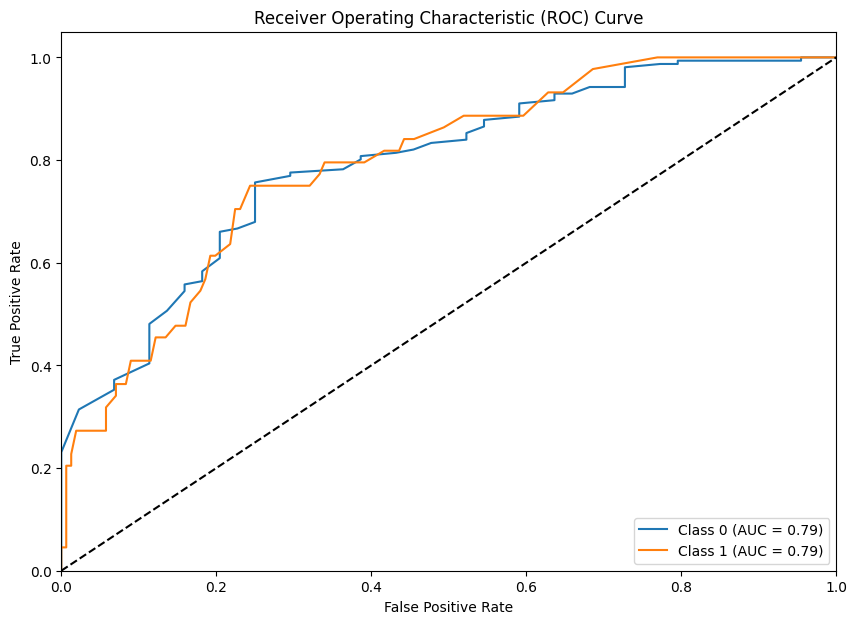

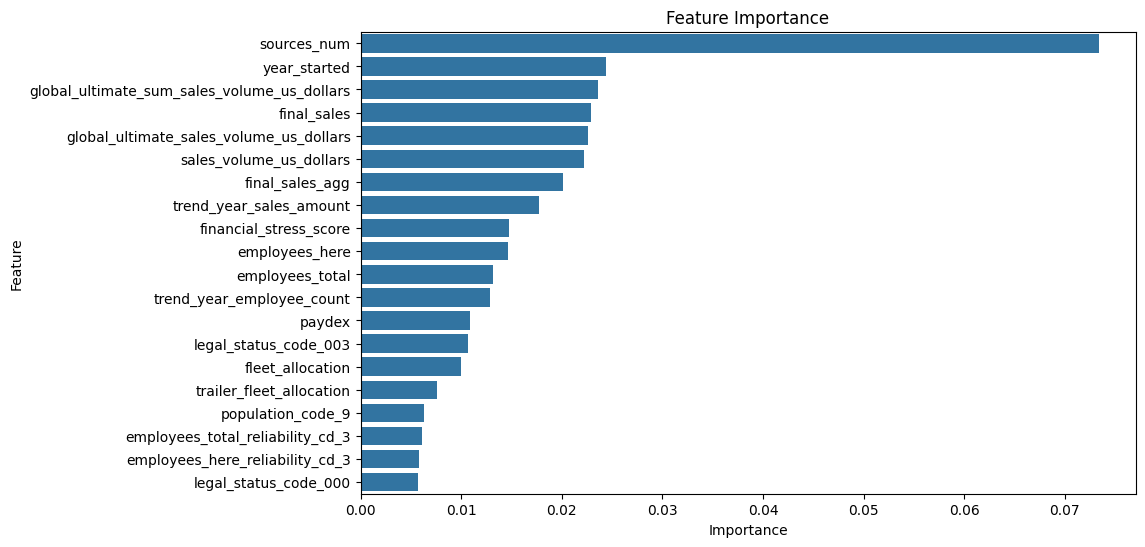

In [51]:
data_sf = data.drop(columns=['rn_flag'])


X, y = data_sf.drop(columns={'sf_flag'}), data_sf['sf_flag']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=122)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=122)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate ROC-AUC score for each class using one-vs-rest approach
roc_auc_dict = {}
for i in range(len(data.sf_flag.unique())):
    y_test_bin = (y_test == i).astype(int)
    roc_auc_dict[i] = roc_auc_score(y_test_bin, y_pred_proba[:, i])

print("ROC-AUC Scores for each class:")
for i, score in roc_auc_dict.items():
    print(f"Class {data.sf_flag.unique()[i]}: {score}")

# Plot ROC curve for each class
fpr = {}
tpr = {}
for i in range(len(data.sf_flag.unique())):
    y_test_bin = (y_test == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_pred_proba[:, i])

plt.figure(figsize=(10, 7))
for i in range(len(data.sf_flag.unique())):
    plt.plot(fpr[i], tpr[i], label=f'Class {data.sf_flag.unique()[i]} (AUC = {roc_auc_dict[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,  
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()
